In [18]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [19]:
ticker = "BTC-USD"
stock = yf.Ticker(ticker.upper())
history = stock.history(period='max')

In [20]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"3,594.00","3,594.00","3,594.00","3,594.00","3,594.00","3,594.00","3,594.00"
mean,"17,088.49","17,479.44","16,672.61","17,105.76","17,375,587,348.48",0.00,0.00
std,"18,964.90","19,395.64","18,495.72","18,978.90","19,166,680,610.41",0.00,0.00
min,176.90,211.73,171.51,178.10,"5,914,570.00",0.00,0.00
25%,"1,066.45","1,109.21","1,043.69","1,073.84","255,643,008.00",0.00,0.00
50%,"8,911.06","9,163.79","8,723.38","8,909.89","13,429,283,387.00",0.00,0.00
75%,"28,040.94","28,514.89","27,429.81","28,075.27","27,996,679,945.50",0.00,0.00
max,"73,079.38","73,750.07","71,334.09","73,083.50","350,967,941,479.00",0.00,0.00


In [4]:
stock.info

{'address1': "1 St James's Square",
 'city': 'London',
 'zip': 'SW1Y 4PD',
 'country': 'United Kingdom',
 'phone': '44 20 7496 4000',
 'fax': '44 20 7496 4630',
 'website': 'https://www.bp.com',
 'industry': 'Oil & Gas Integrated',
 'industryKey': 'oil-gas-integrated',
 'industryDisp': 'Oil & Gas Integrated',
 'sector': 'Energy',
 'sectorKey': 'energy',
 'sectorDisp': 'Energy',
 'longBusinessSummary': 'BP p.l.c. provides carbon products and services. The company operates through Gas & Low Carbon Energy, Oil Production & Operations, and Customers & Products segments. It engages in the production of natural gas, and integrated gas and power; trading of gas; operation of onshore and offshore wind power, as well as hydrogen and carbon capture and storage facilities; trading and marketing of renewable and non-renewable power; and production of crude oil. In addition, the company involved in convenience and retail fuel, EV charging, Castrol lubricant, aviation, B2B, and midstream businesses;

In [5]:
stock.financials

""


In [6]:
stock.cash_flow

""


In [7]:
stock.balance_sheet

""


In [23]:
history = history['2022-07-01':]

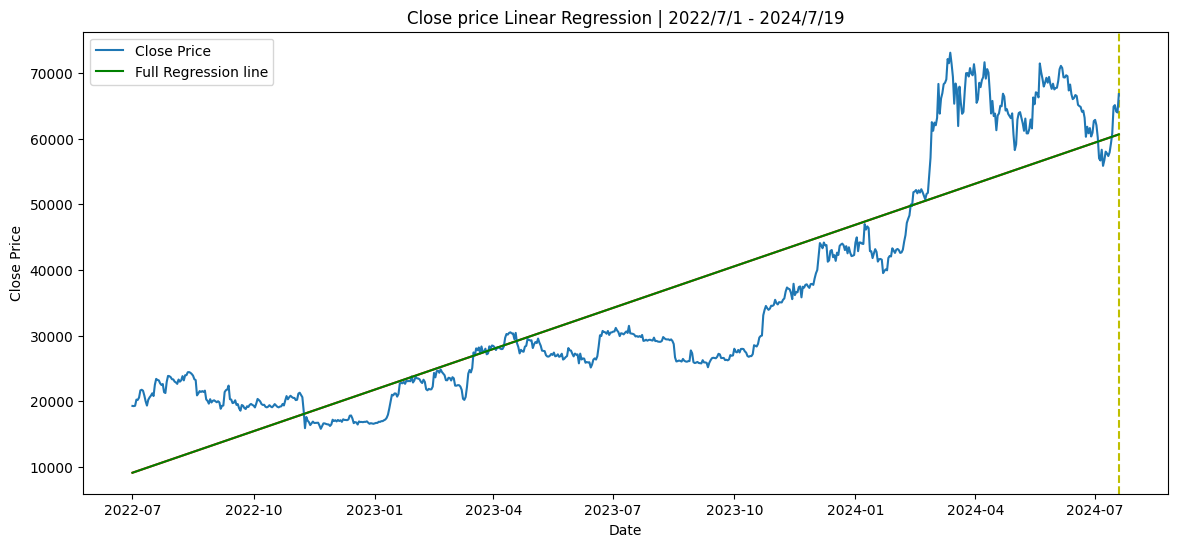

Coefficient (slope): 68.81540601666624


In [13]:
a = plotting.plot_regression_line(history, reg_line_count=1, log_scale=False)

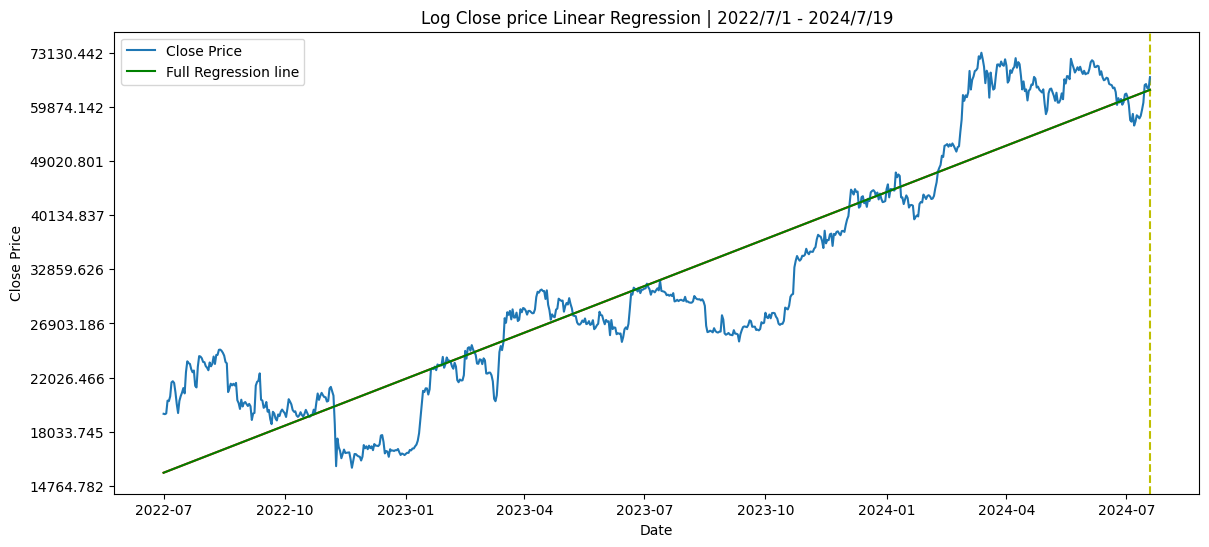

Coefficient (slope): 0.0018871924675659898


<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [14]:
plotting.plot_regression_line(history, reg_line_count=1, log_scale=True)

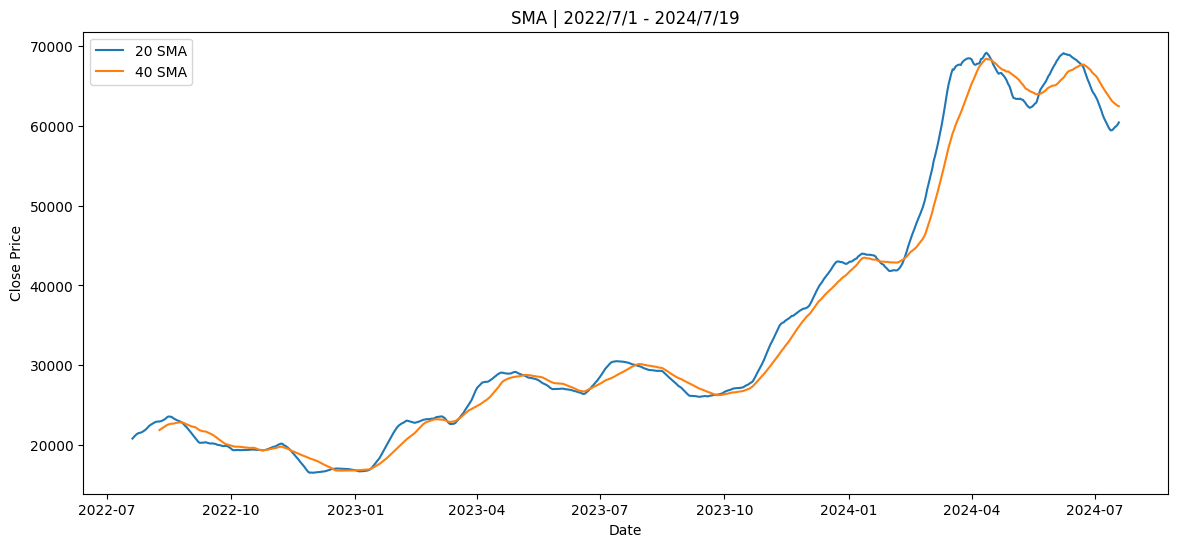

<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [15]:
plotting.plot_sma(history, [20, 40], hide_data=True)

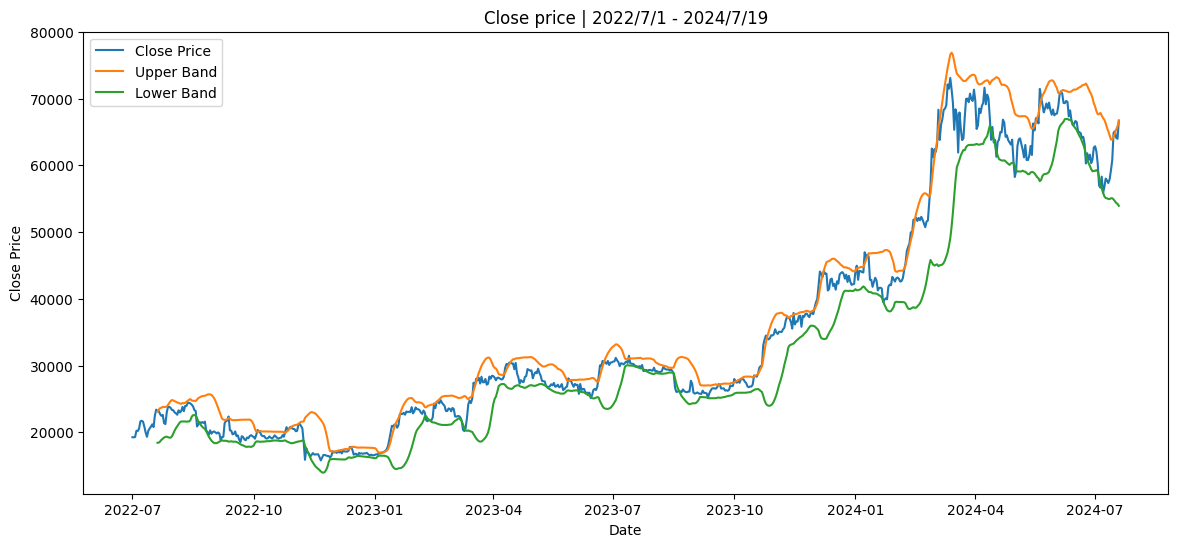

In [25]:
plotting.plot_bolinger_bands(history, 20, 2)

In [13]:
import pandas as pd
from ta.utils import dropna
from ta.volatility import BollingerBands


# Load datas
df = history['2023-07-15':]


# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

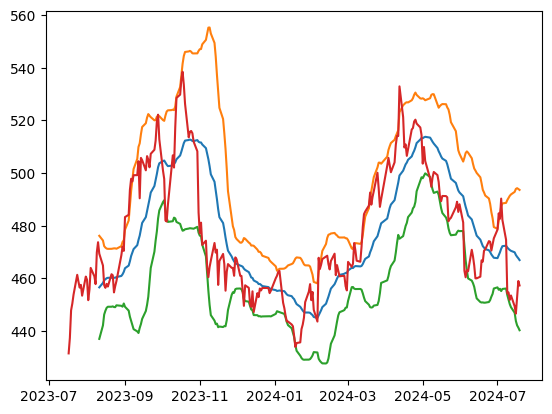

In [15]:
plt.plot(df['bb_bbm'])
plt.plot(df['bb_bbh'])
plt.plot(df['bb_bbl'])
plt.plot(df['Close'])